In [1]:
#Don't mind this box
import os
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir("/Users/alex/Desktop/vodafone")

# List all files and directories in current directory
#os.listdir('.')

In [2]:
#Clustering with k means and PCA

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA

In [3]:
#load data 
df=pd.read_csv('data_train1.csv')
df=df.drop(['Store_ID'],axis=1)

#choose target
X=df.iloc[:,:-1].values
y=df['Footfall_classif'].values

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [5]:
#Reduce data to 2 components for the plot
data_PCA = PCA(n_components=2).fit_transform(X_train)

#Choose 3 clusters since labels=0,1,2
k_means = KMeans(n_clusters=3)
k_means.fit(data_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
#Build the the bounding box in data coordinates that the image will fill.

x_min, x_max = data_PCA[:, 0].min(), data_PCA[:, 0].max()
y_min, y_max = data_PCA[:, 1].min(), data_PCA[:, 1].max() 

xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

#ravel returns a 1_D array (it's like a reshape)
#np.c_Translates slice objects to concatenation along the second axis. 
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

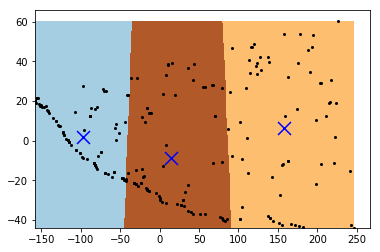

In [7]:
#plot kmeans clustering
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(data_PCA[:, 0], data_PCA[:, 1], 'k.', markersize=4)

centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='blue', zorder=8)